In [28]:
from IPython.display import Image 
%matplotlib inline

## Análisis de Redes

El día de hoy veremos dos temas que convergen: El consumo de datos desde APIs y Análisis de Redes.  

# Introducción a Network X

NetworkX trabaja con grafos, cuya definición es una colección de nodos (vertices) cuyos pares están identificados (llamados edges, links). En networkX, cada nodo puede ser un objeto hashable (Un texto, una imagen, un xml, otro grafo) 

In [12]:
import networkx as nx

g = nx.Graph()

# Agregar un nodo
g.add_node(1)

#Agregar multiples nodos
g.add_nodes_from([2, 3, 'four', 5]) 

g.nodes()  # run g.nodes() to view the graph

[1, 2, 3, 5, 'four']

In [8]:
# No importa si agregamos nodos que ya existen
g.add_node(1)
g.nodes()

[1, 2, 3, 5, 'four']

In [9]:
g.remove_node(1)
g.nodes()

[2, 3, 5, 'four']

In [10]:
g.remove_node(1)

NetworkXError: The node 1 is not in the graph.

In [18]:
g.remove_nodes_from([2,3])
g.nodes()

[1, 5, 'four']

In [19]:
g.add_nodes_from([1,2, 3, 'four', 5]) 

In [24]:
#Agregar edges

g.add_edge(1,2)
print('edges:', g.edges())
print('nodes:', g.nodes())

edges: [(1, 2)]
nodes: [1, 2, 3, 5, 'four']


In [25]:
# crear nuevo grafo. Nota que no necesitamos especificar los nodos
h = nx.Graph() 
h.add_edge("a","b")
print('edges:', h.edges())
print('nodes:', h.nodes())

edges: [('a', 'b')]
nodes: ['a', 'b']


/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


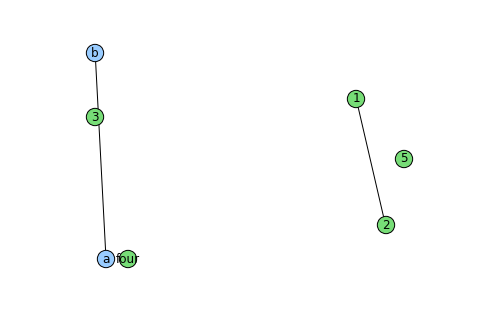

In [29]:
GREEN = "#77DD77"
BLUE = "#99CCFF"
nx.draw(g, node_color=GREEN, with_labels=True)
nx.draw(h, node_color=BLUE, with_labels=True)

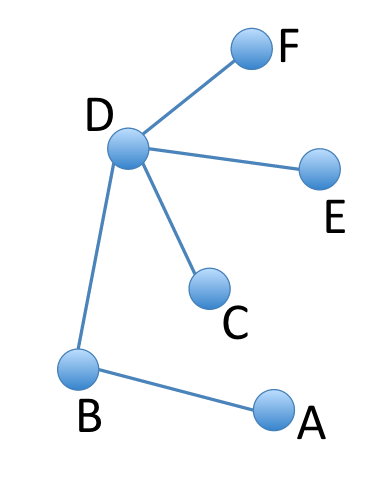

In [30]:
Image("https://github.com/sarguido/networkx-tutorial/raw/8a15bfcded69415936c81055b429dd22348f481a/materials/images/graph.png")

In [31]:
# Replica la red de aqui arriba ^^

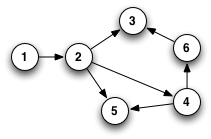

In [32]:
Image("http://think-like-a-git.net/assets/images2/directed-graph.png")

directed edges: [(1, 2), (2, 3)]


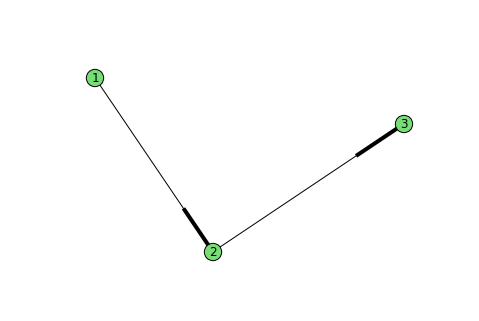

In [35]:
# Grafos dirigidos son aquellos que las conexiones tienen dirección
dg = nx.DiGraph()
dg.add_edges_from([(1,2), (2,3)])
print('directed edges:', dg.edges())
nx.draw(dg, node_color=GREEN, with_labels=True)

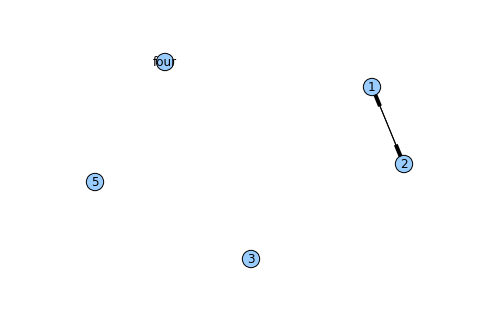

In [36]:
# Podemos tomar grafos y hacerlos dirigidos
dg = nx.DiGraph(g)
nx.draw(dg, node_color=BLUE, with_labels=True)


In [37]:
# Nota que de 1 a 2 hay dos edges dirigidos
dg.edges()

[(1, 2), (2, 1)]

### Atributos a los edges y nodeos
Se pueden agregar atributos a los ejes, para guardar datos extras.

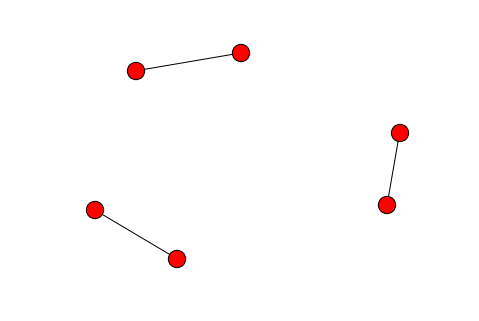

In [38]:
cities = nx.Graph()

cities.add_edge('San Diego', 'Los Angeles', { 'distance': 0.4})
cities.add_edge('New York', 'Nashville', { 'distance': 5.6})
cities.add_edge('Boston', 'D.C.', { 'distance': 0.8})

nx.draw(cities)

Hay varias operaciones que se pueden hacer con los grafos.
- subgraph(G, nbunch): induce subgraph of G on nodes in nbunch
- union(G1,G2): graph union
- disjoint_union(G1,G2): graph union assuming all nodes are different
- cartesian_product(G1,G2): return Cartesian product graph
- compose(G1,G2): combine graphs identifying nodes common to both
- complement(G): graph complement
- create_empty_copy(G): return an empty copy of the same graph class
- convert_to_undirected(G): return an undirected representation of G
- convert_to_directed(G): return a directed representation of G


# Describiendo una red

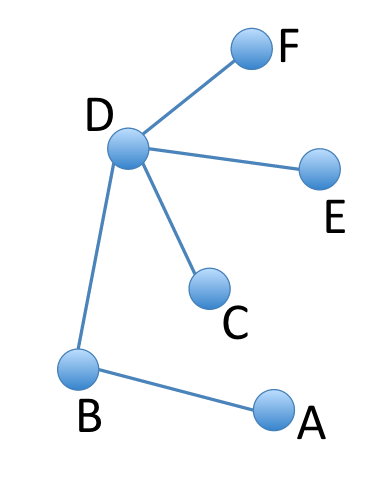

In [39]:
Image("https://github.com/sarguido/networkx-tutorial/raw/8a15bfcded69415936c81055b429dd22348f481a/materials/images/graph.png")

Degree Distribution: {1: 1, 2: 1, 3: 0, 5: 0, 'four': 0}


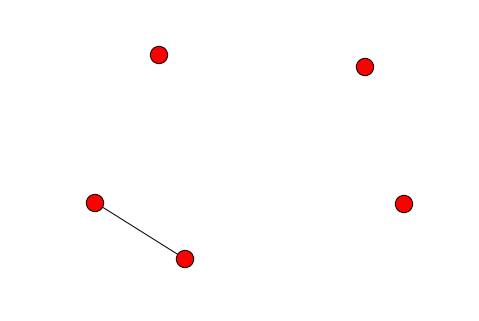

In [44]:
# Distribución para todos los nodos
nx.draw(g)
print('Degree Distribution:', g.degree())

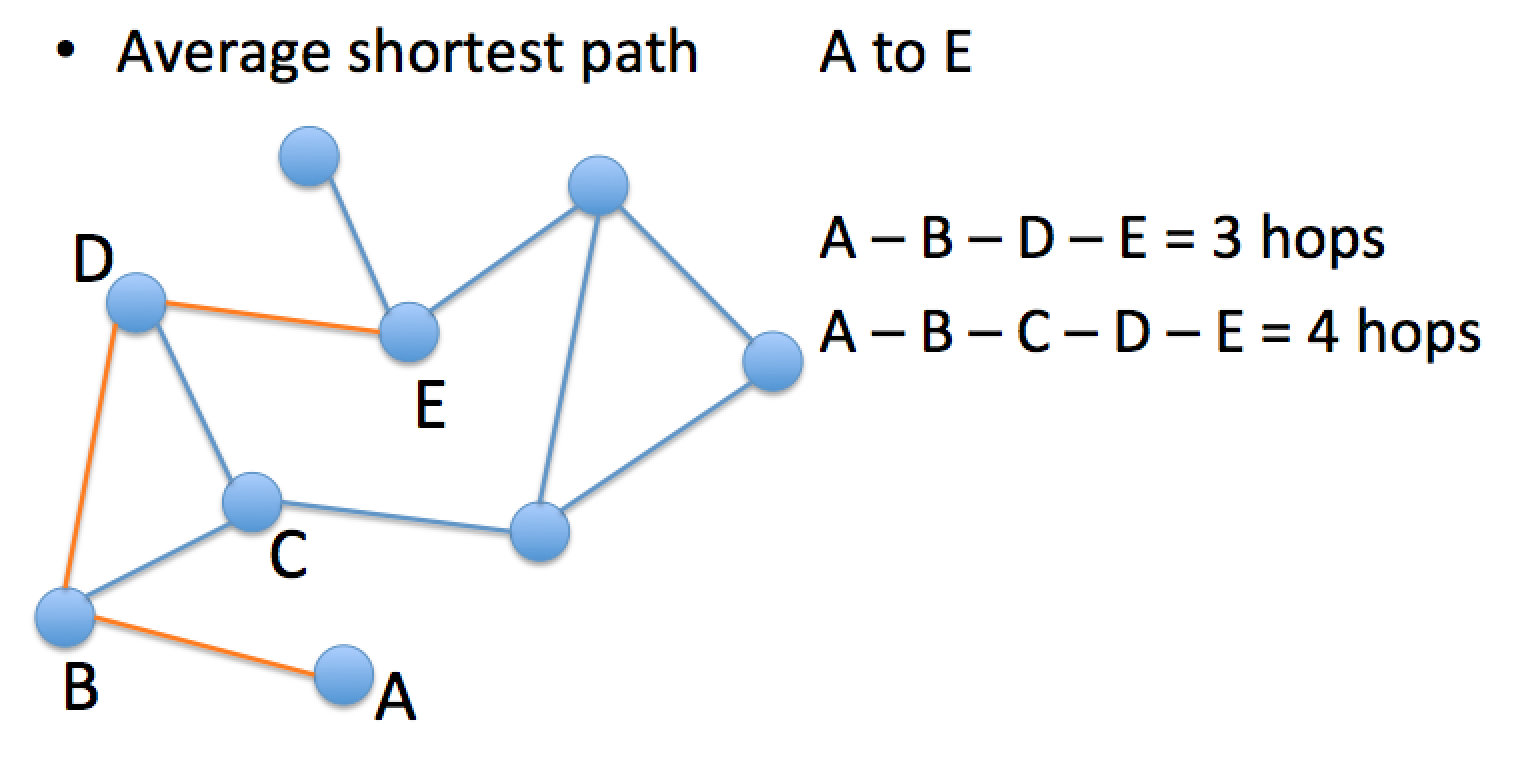

In [43]:
Image("https://github.com/sarguido/networkx-tutorial/raw/8a15bfcded69415936c81055b429dd22348f481a/materials/images/graph-paths.png")

In [46]:
paths = nx.Graph()
paths.add_edges_from([
    ('A','B'), ('B','D'), ('B','C'), ('D','E'), ('D','C'),
    ('C','1'), ('1','2'), ('1','3'), ('2','3'), 
    ('E','2'), ('E','4')])

# Display average shortest path details
print('El camino más corto de A a E es', nx.shortest_path_length(paths, 'A','E'), 'saltos:')
print(nx.shortest_path(paths, 'A','E'))

El camino más corto de A a E es 3 saltos:
['A', 'B', 'D', 'E']


### Centralidad en la Red
- **Degree**: numero de edges para llegar al nodo X
- **Betweenness**:numero de paths cortos para pasar por el nodo X
- **Closeness**: promedio entre los paths más cortos entre X y los demás nodos.

In [51]:
print("Degree")
print(paths.degree())
print("Degree Centrality (normalizado)")
print(nx.degree_centrality(paths))

Degree
{'C': 3, '1': 3, 'D': 3, 'E': 3, 'B': 3, '4': 1, '3': 2, '2': 3, 'A': 1}
Degree Centrality (normalizado)
{'C': 0.375, '1': 0.375, 'D': 0.375, 'E': 0.375, 'B': 0.375, '4': 0.125, '3': 0.25, '2': 0.375, 'A': 0.125}


In [52]:
print("Betweeness Centrality")
print(nx.betweenness_centrality(paths, normalized="True"))
print("Betweeness Centrality (normalizado)")
print(nx.betweenness_centrality(paths, normalized="False"))

Betweeness Centrality
{'C': 6.5, '1': 5.5, 'D': 7.0, 'E': 9.5, 'B': 7.0, '4': 0.0, '3': 0.0, '2': 4.5, 'A': 0.0}
Betweeness Centrality (normalizado)
{'C': 6.5, '1': 5.5, 'D': 7.0, 'E': 9.5, 'B': 7.0, '4': 0.0, '3': 0.0, '2': 4.5, 'A': 0.0}


In [53]:
print("Closeness Centrality")
print(nx.closeness_centrality(paths))

Closeness Centrality
{'C': 0.5714285714285714, '1': 0.5333333333333333, 'D': 0.5714285714285714, 'E': 0.5714285714285714, 'B': 0.5, '4': 0.38095238095238093, '3': 0.42105263157894735, '2': 0.5, 'A': 0.34782608695652173}


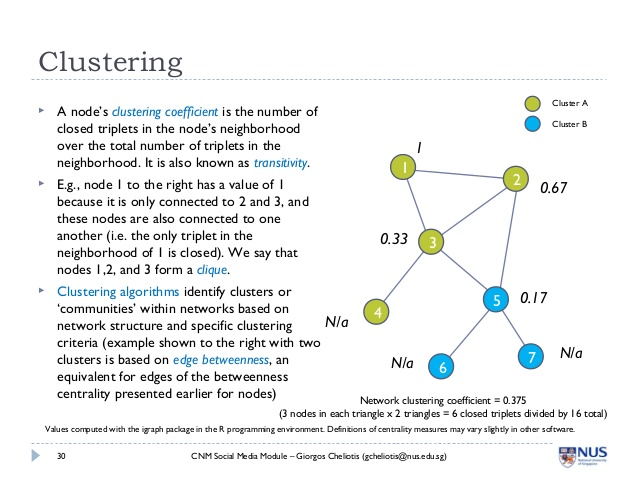

In [58]:
Image("http://image.slidesharecdn.com/socialnetworkanalysis-100225055227-phpapp02/95/social-network-analysis-30-638.jpg")

In [54]:
# Otras medidas:
print("Clustering")
print(nx.average_clustering(paths))

Clustering


0.2962962962962963

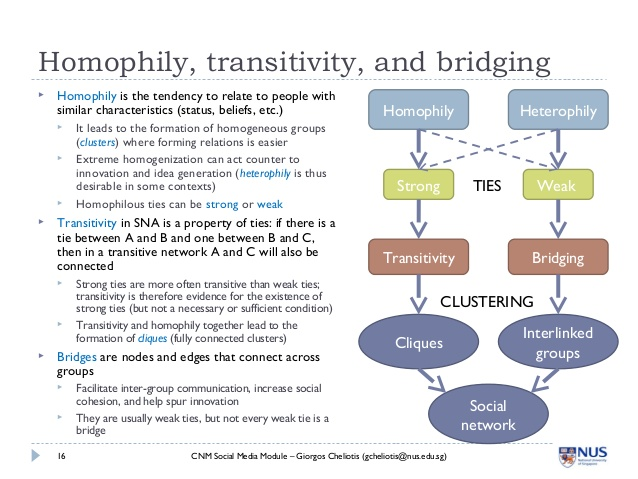

In [60]:
Image("http://image.slidesharecdn.com/socialnetworkanalysis-100225055227-phpapp02/95/social-network-analysis-16-638.jpg")

In [56]:
print("Trasitivity")
print(nx.transitivity(paths))

Trasitivity
0.3157894736842105


In [61]:
print("Eigenvector Centrality")
#Entre mas importantes los nodos que están cerca de ti, más importante eres como nodo.
print(nx.eigenvector_centrality(paths))
print(nx.eigenvector_centrality_numpy(paths))


Eigenvector Centrality
{'C': 0.42823461309640687, '1': 0.398520378823872, 'D': 0.41057987562314696, 'E': 0.3328155993501658, 'B': 0.35633053553137944, '4': 0.12229301735011186, '3': 0.28344926590402336, '2': 0.37288142808226993, 'A': 0.13093314315268864}
{'C': 0.4282346035038208, '1': 0.39852060848941007, 'D': 0.4105792163591479, 'E': 0.3328164835887887, 'B': 0.35633098633511134, '4': 0.12229257500445413, '3': 0.28344948129547787, '2': 0.372880759389148, 'A': 0.13093291955646888}


# Stop: Ahora, redes de verdad.

https://developers.facebook.com/tools/explorer
https://dev.twitter.com/rest/tools/console

### ¿Cómo consumimos datos desde las APIs de las redes?

Cuando las apis son abiertas, es tan facil como hacer un request y usar los datos.

In [66]:
import requests
#http://datamx.io/dataset/inversion-ambiental/resource/ba3034a7-b2aa-4584-abdc-574a57cf3a45
r = requests.get("http://datamx.io/api/action/datastore_search?resource_id=ba3034a7-b2aa-4584-abdc-574a57cf3a45&q=jones")
financing_data = r.json()

In [67]:
financing_data

{'help': 'Search a DataStore resource.\n\n    The datastore_search action allows you to search data in a resource.\n    DataStore resources that belong to private CKAN resource can only be\n    read by you if you have access to the CKAN resource and send the appropriate\n    authorization.\n\n    :param resource_id: id or alias of the resource to be searched against\n    :type resource_id: string\n    :param filters: matching conditions to select, e.g {"key1": "a", "key2": "b"} (optional)\n    :type filters: dictionary\n    :param q: full text query (optional)\n    :type q: string\n    :param plain: treat as plain text query (optional, default: true)\n    :type plain: bool\n    :param language: language of the full text query (optional, default: english)\n    :type language: string\n    :param limit: maximum number of rows to return (optional, default: 100)\n    :type limit: int\n    :param offset: offset this number of rows (optional)\n    :type offset: int\n    :param fields: fields 

Pero, las APIs de Facebook y de Twitter necesitan autenticarse.
(Para twitter prefiero Tweepy, para Facebook si hago mis propias llamadas. Acá los metodos que uso para jugar)

In [ ]:
# Ejemplo de Tweepy (Hay que definir tokens)
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

In [69]:
# Para FB, lo unico que necesitas agregar es un token al final de cada llamada,
#  http://facebook.com/[api path que puedes obtener del explorer]+ &access_token=''
#que puedes obtener fácilmente así:
def fb_token():
    r = requests.get('https://graph.facebook.com/oauth/access_token?grant_type=client_credentials&client_id='+client_id+'&client_secret='+client_secret)
    access_token = r.text.split('=')[1]
    return access_token

# Regresemos a analizar datos de las redes en Network X

Lamentablemente, las llamadas a twitter son muy costosas. Solo te permite hacer 300 por hora, wtf! Por lo que haremos un experimento offline. Lo mejor es que tu lo harás casi todo.

In [72]:
import json
f = open('list.PyTennessee.json')

data = json.load(f)
pairs = []

for user in data['users']:
    pairs.append(('PyTennessee', str(user['screen_name'])))

pairs[:10]

[('PyTennessee', 'LampPostGroup'),
 ('PyTennessee', 'octovisinc'),
 ('PyTennessee', 'nashdevcal'),
 ('PyTennessee', 'hsvpy'),
 ('PyTennessee', 'bvalentine615'),
 ('PyTennessee', 'awebneck'),
 ('PyTennessee', 'ascot21'),
 ('PyTennessee', 'pyohio'),
 ('PyTennessee', 'CalEvans'),
 ('PyTennessee', 'nodevember')]

In [75]:
# Los datos de amistades estan divididos en varios archivos.
#Por lo que hay que recorrerlos todos
import os

for (dir_path, dir_names, file_names) in os.walk('friend_relationships/'):
    files = file_names
    
for file_name in files:
    with open('friend_relationships/' + file_name) as p:
        pair_data = json.load(p)
        for k in pair_data.keys():
            twitter_pair = k.split()
            if pair_data[k]['relationship']['source']['following'] is True:
                pairs.append((str(twitter_pair[0]), str(twitter_pair[1])))
            elif pair_data[k]['relationship']['source']['followed_by'] is True:
                pairs.append((str(twitter_pair[1]), str(twitter_pair[0])))
                
len(pairs)

1286

## Hora de hacer redes con datos de twitter

Usa lo que aprendiste arriba para hacer análisis de los amigos de PyTennesee! :D

In [76]:
#Grafo unidireccional
import networkx as nx


In [77]:
# ¿La red esta conectada o no?

In [79]:
#  Si quieres hacer sort a un diccionario para encontrar los que tienen
# los valores mayores y menores, usa esta funcion para hacerlo 
# en la centralidad.

import operator

def centrality_sort(centrality_dict):
    return sorted(centrality_dict.iteritems(), key=operator.itemgetter(1))
# ej. degree_sorted = centrality_sort(degree_vals)

In [80]:
#¿Qué nodos tienen la mayor centralidad por grados (degree centrality), quienes la menor?

In [81]:
# ¿Qué nodos tienen la mayor cercanía (betweenes centrality), cuales la menor?

In [ ]:
# Investiga las subsecciones de este grafo.

In [93]:
# Grafo direccional

In [94]:
# Corre alguna medida de centralidad:
# in_degree_centrality(): Numero de amistades que entran (seguidores)
# out_degree_centrality(): Numero de amistades que salen (A quien sigues)

In [96]:
# top 20 in_degree

In [97]:
# top 20 out_degree

In [ ]:
# Investiga las subsecciones

In [99]:
# Modelos de Redes
# Con cual queda mejor? ver slides del final.

# Fuente
https://github.com/sarguido/networkx-tutorial
https://github.com/networkx/notebooks/blob/master/tutorial.ipynb
http://www.slideshare.net/BenjaminBengfort/social-network-analysis-with-python
http://stackoverflow.com/questions/13914920/networkx-extract-the-connected-component-containing-a-given-node-directed-grap